In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
demographic_data = pd.read_csv(r'D:\My files\LIRNHackathon\Hackathon\data\w1_demographics (1).csv')
non_smart_data = pd.read_csv(r'D:\My files\LIRNHackathon\Hackathon\data\non_smart_meter_data (1).csv')
smart_data = pd.read_csv(r'D:\My files\LIRNHackathon\Hackathon\data\combined.csv')
water_heating_and_cooking = pd.read_csv(r'D:\My files\LIRNHackathon\Hackathon\data\w1_electricity_generation_water_heating_cooking.csv')
house_hold_info = pd.read_csv(r'D:\My files\LIRNHackathon\Hackathon\data\w1_household_information_and_history.csv')

In [ ]:
demographic_data

Index(['household_ID', 'member_ID', 'age',
       'relationship_to_the_head_of_household', 'gender', 'ethnicity',
       'religion', 'marital_status',
       'current_attendance_in_any_education_instituition',
       'highest_level_of_education', 'main_activity_engaged_in',
       'main_occupation', 'daily_wage_owner_or_not',
       'employment_status_of_the_main_occupation',
       'no_of_hours_stayed_at_home_during_last_week',
       'member_went_out_for_work_or_not_during_last_week'],
      dtype='object')

In [71]:
non_smart_data['month'] = pd.to_datetime(non_smart_data['month'])

In [86]:
non_smart_data.columns

Index(['household_ID', 'month', 'consumption', 'Year', 'Month', 'YearMonth'], dtype='object')

In [80]:
non_smart_data['Year'] = non_smart_data['month'].dt.year
non_smart_data['Month'] = non_smart_data['month'].dt.month
non_smart_data['YearMonth'] = non_smart_data['month'].dt.strftime('%Y-%m')

In [87]:
non_smart_data1 = non_smart_data.drop(columns=['household_ID','month','Year','Month'])

In [89]:
non_smart_data_monthly_summary = non_smart_data1.groupby('YearMonth').sum()
non_smart_data_monthly_summary

,consumption
YearMonth,
2022-10,485686.0
2022-11,476164.0
2022-12,460748.0
2023-01,458576.0
2023-02,449116.0
2023-03,433425.0
2023-04,492781.0
2023-05,501600.0
2023-06,521200.0


Text(57.097222222222214, 0.5, 'Total Consumption of ALL HouseHolds')

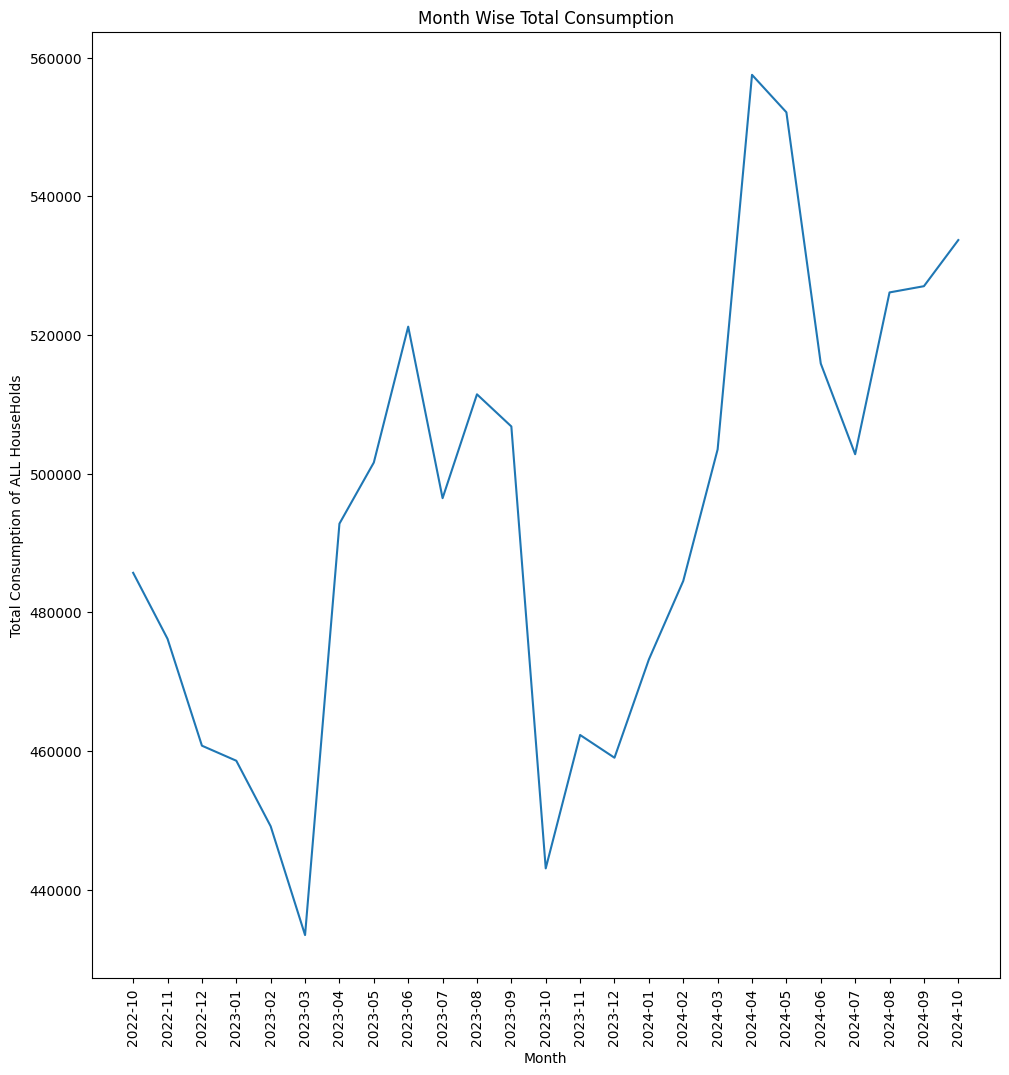

In [199]:
plt.figure(figsize=[10,10])
plt.plot(non_smart_data_monthly_summary.index,non_smart_data_monthly_summary['consumption'])
plt.tight_layout()
plt.xticks(non_smart_data_monthly_summary.index,rotation ='vertical')
plt.title("Month Wise Total Consumption")
plt.xlabel('Month')
plt.ylabel('Total Consumption of ALL HouseHolds')

In [39]:
demographic_data1 = demographic_data.drop(columns = ['member_ID','age',
       'relationship_to_the_head_of_household', 'gender', 'ethnicity',
       'religion', 'marital_status',
       'current_attendance_in_any_education_instituition',
       'highest_level_of_education', 'main_activity_engaged_in',
       'main_occupation', 'daily_wage_owner_or_not',
       'employment_status_of_the_main_occupation',
       'no_of_hours_stayed_at_home_during_last_week',
       'member_went_out_for_work_or_not_during_last_week'])
# demographic_data1['NumberofMembers'] = demographic_data.groupby('household_ID').count()['member_ID']
# demographic_data1.drop(columns=['member_ID'])


In [128]:
x = demographic_data.groupby('household_ID').count()['member_ID']
x.unique()

array([ 4,  3,  2,  6,  5,  7,  1,  8, 10,  9, 13, 11, 12], dtype=int64)

In [139]:
y = non_smart_data.groupby('household_ID').aggregate({'consumption':['sum']})['consumption']['sum'].values

In [138]:
y.values

array([2284., 1184., 4713., ...,  190., 3716., 4005.])

Text(0.5, 0, 'Number of HouseHold members')

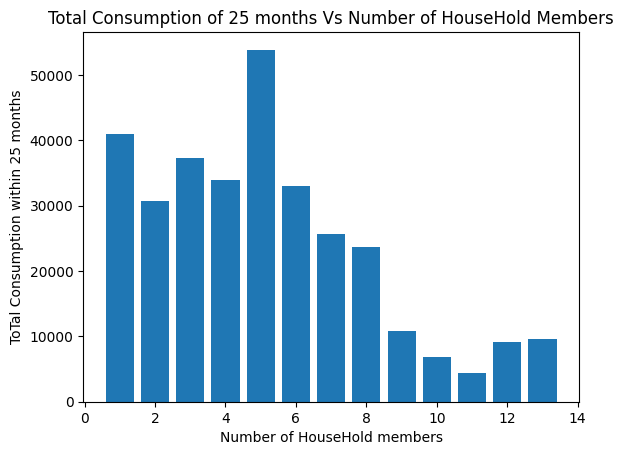

In [140]:
plt.figure()
plt.bar(x, y)
plt.title("Total Consumption of 25 months Vs Number of HouseHold Members")
plt.ylabel("ToTal Consumption within 25 months")
plt.xlabel("Number of HouseHold members")

In [152]:
non_smart_data_summary_mean = non_smart_data.groupby(['household_ID']).aggregate({'consumption':'mean'})





In [153]:
non_smart_data_summary_mean

,consumption
household_ID,
ID0001,91.36
ID0002,47.36
ID0003,188.52
ID0004,236.24
ID0005,94.04
...,...
ID4059,116.88
ID4060,24.72
ID4061,7.60


In [232]:
non_smart_household = house_hold_info.merge(non_smart_data_summary_mean,how='inner',on='household_ID')
non_smart_household

,household_ID,no_of_electricity_meters,electricity_provider_csc_area,own_the_house_or_living_on_rent,occupy_renters_boarders,awareness_of_electricity_consumption_of_renters,built_year_of_the_house,type_of_house,floor_which_house_located,no_of_storeys,...,availability_of_certificate_of_compliance,main_material_used_for_walls_of_the_house,main_material_used_for_roof_of_the_house,any_constructions_or_renovations_in_the_household,highest_level_of_education_of_the_chief_wage_earner,occupation_of_the_chief_wage_earner,socio_economic_class,total_monthly_expenditure_of_last_month,type_of_electricity_meter,consumption
0,ID0001,1,GALLE,"Yes, I or a household member owns it.",I don't occupy any of the above.,NaN,2000-2009,Single House - Double Floor,NaN,NaN,...,No,Brick,Asbestos,No,O/L or A/L pending / Passed,Skilled Worker,SEC C,35000.0,Non smart meter,91.36
1,ID0002,1,GALLE,"Yes, I or a household member owns it.",I don't occupy any of the above.,NaN,Before 1980,Single House - Single Floor,NaN,NaN,...,Yes,Brick,Asbestos,No,Diploma with O/L or A/L (Non graduate),Unskilled Worker,SEC D,40000.0,Non smart meter,47.36
2,ID0003,1,GALLE,"Yes, I or a household member owns it.",I don't occupy any of the above.,NaN,1980-1989,Single House - Single Floor,NaN,NaN,...,No,Brick,Tile,No,Graduate / Post-Grads / Degree level professio...,Middle and Senior executive,SEC A,250000.0,Smart meter,188.52
3,ID0004,1,BORALASGAMUWA,"Yes, I or a household member owns it.",I don't occupy any of the above.,NaN,2010-2019,Single House - Double Floor,NaN,NaN,...,No,Cement Block,Concrete,No,Other professional certificates with O/L or A/...,1-9 Employed,SEC A,100000.0,Smart meter,236.24
4,ID0005,1,KOLONNAWA,"Yes, I or a household member owns it.",I don't occupy any of the above.,NaN,2010-2019,Flat,10.0,1.0,...,Yes,I am not aware of that,Concrete,No,Schooling up to Grade 6 - 9,Skilled Worker,SEC D,60000.0,Smart meter,94.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4058,ID4059,1,NUGEGODA,"Yes, I or a household member owns it.",I don't occupy any of the above.,NaN,In 2020 or After 2020,Single House - Double Floor,NaN,NaN,...,NaN,Brick,NaN,No,Graduate / Post-Grads / Degree level professio...,Clerk / Salesman grades,SEC B,150000.0,Smart meter,116.88
4059,ID4060,1,HIKKADUWA,"Yes, I or a household member owns it.",I don't occupy any of the above.,NaN,Before 1980,Single House - Single Floor,NaN,NaN,...,NaN,Pressed soil blocks,NaN,No,O/L or A/L pending / Passed,Boutique owner,SEC B,50000.0,Non smart meter,24.72
4060,ID4061,1,WATTALA,"Yes, I or a household member owns it.",I don't occupy any of the above.,NaN,2000-2009,Single House - Single Floor,NaN,NaN,...,NaN,Cement Block,NaN,No,O/L or A/L pending / Passed,Unskilled Worker,SEC D,20000.0,Non smart meter,7.60
4061,ID4062,1,ALUTHGAMA,"Yes, I or a household member owns it.",I don't occupy any of the above.,NaN,1980-1989,Single House - Single Floor,NaN,NaN,...,NaN,Cabook,NaN,No,O/L or A/L pending / Passed,Self employed (Professional) - No employees,SEC B,30000.0,Non smart meter,148.64


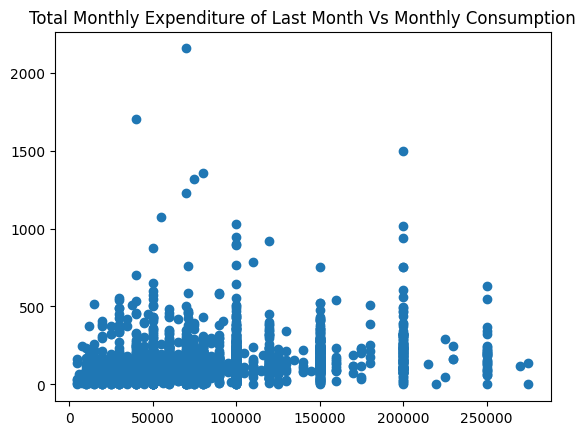

In [239]:
X = non_smart_household['total_monthly_expenditure_of_last_month'].fillna(non_smart_household['total_monthly_expenditure_of_last_month'].mean()).values


Y = non_smart_household['consumption'].dropna().values


plt.title("Total Monthly Expenditure of Last Month Vs Monthly Consumption")
plt.scatter(X,Y)

In [226]:
#non_smart_household['total_monthly_expenditure_of_last_month'].fillna(non_smart_household['total_monthly_expenditure_of_last_month'].mean(),inplace=True)
non_smart_household['floor_area'].fillna(non_smart_household['floor_area'].mean(),inplace=True)
non_smart_household.isnull().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_23776\215531815.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  non_smart_household['floor_area'].fillna(non_smart_household['floor_area'].mean(),inplace=True)


floor_area                                 0
no_of_household_members                    0
total_monthly_expenditure_of_last_month    0
consumption                                0
dtype: int64

In [203]:
non_smart_household.columns

Index(['household_ID', 'no_of_electricity_meters',
       'electricity_provider_csc_area', 'own_the_house_or_living_on_rent',
       'occupy_renters_boarders',
       'awareness_of_electricity_consumption_of_renters',
       'built_year_of_the_house', 'type_of_house', 'floor_which_house_located',
       'no_of_storeys', 'floor_area', 'no_of_household_members',
       'charging_method_of_renters_for_electricity',
       'charged_method_for_rent_for_electricity',
       'is_there_business_carried_out_in_the_household', 'type_of_business',
       'whom_or_how_the_house_was_designed',
       'availability_of_certificate_of_compliance',
       'main_material_used_for_walls_of_the_house',
       'main_material_used_for_roof_of_the_house',
       'any_constructions_or_renovations_in_the_household',
       'highest_level_of_education_of_the_chief_wage_earner',
       'occupation_of_the_chief_wage_earner', 'socio_economic_class',
       'total_monthly_expenditure_of_last_month', 'type_of_electr

In [218]:
non_smart_household.drop(columns = ['household_ID', 'no_of_electricity_meters',
       'electricity_provider_csc_area', 'own_the_house_or_living_on_rent',
       'occupy_renters_boarders',
       'awareness_of_electricity_consumption_of_renters',
       'built_year_of_the_house', 'type_of_house', 'floor_which_house_located',
       'no_of_storeys',
       'charging_method_of_renters_for_electricity',
       'charged_method_for_rent_for_electricity',
       'is_there_business_carried_out_in_the_household', 'type_of_business',
       'whom_or_how_the_house_was_designed',
       'availability_of_certificate_of_compliance',
       'main_material_used_for_walls_of_the_house',
       'main_material_used_for_roof_of_the_house',
       'any_constructions_or_renovations_in_the_household',
       'highest_level_of_education_of_the_chief_wage_earner',
       'occupation_of_the_chief_wage_earner', 'socio_economic_class', 'type_of_electricity_meter'],inplace = True)

In [228]:
X = non_smart_household.to_numpy()

In [229]:
X

array([[1.5000e+03, 4.0000e+00, 3.5000e+04, 9.1360e+01],
       [4.4000e+02, 3.0000e+00, 4.0000e+04, 4.7360e+01],
       [2.5000e+03, 4.0000e+00, 2.5000e+05, 1.8852e+02],
       ...,
       [6.8000e+02, 2.0000e+00, 2.0000e+04, 7.6000e+00],
       [7.0000e+02, 2.0000e+00, 3.0000e+04, 1.4864e+02],
       [2.4000e+03, 5.0000e+00, 1.0000e+05, 1.6020e+02]])

In [191]:
Y

array([ 91.36,  47.36, 188.52, ...,   7.6 , 148.64, 160.2 ])

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [193]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train.reshape(-1,1))
X_test_norm = preprocessing.normalize(X_test.reshape(-1,1))

In [230]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
clusters = kmeans.fit_predict(X)

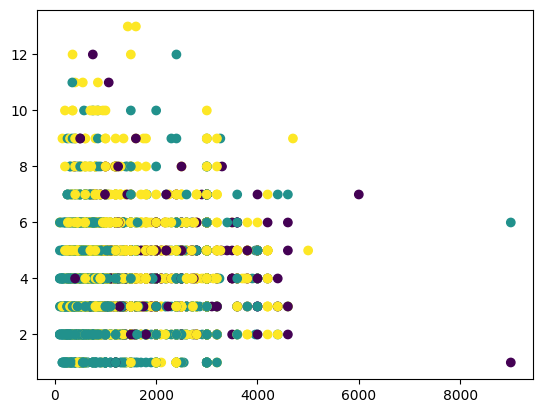

In [231]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')

In [161]:
non_smart_demo_summary = demographic_data.merge(non_smart_data_summary_mean,how='inner', on='household_ID')




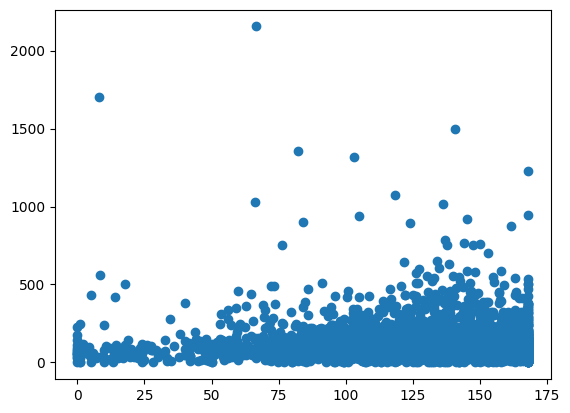

In [ ]:
y2 = non_smart_data_summary_mean['consumption']
x2 = demographic_data.groupby('household_ID').aggregate({'no_of_hours_stayed_at_home_during_last_week': 'mean'})['no_of_hours_stayed_at_home_during_last_week']



In [117]:
non_smart_data_summary_yearly['consumption']

household_ID  Year
ID0001        2022     365.0
              2023    1163.0
              2024     756.0
ID0002        2022     173.0
              2023     581.0
                       ...  
ID4062        2023    1698.0
              2024    1584.0
ID4063        2022     600.0
              2023    1893.0
              2024    1512.0
Name: consumption, Length: 12189, dtype: float64

In [ ]:
plt.bar(non_smart_data_summary_yearly.index,non_smart_data_summary_yearly['consumption'])

In [40]:
non_smart_demo = non_smart_data.merge(demographic_data1,how= 'inner', on = 'household_ID')

In [ ]:
non_smart_demo.groupby('household_ID').obj['consumption']

,household_ID,month,consumption
0,ID0001,2022-10-31,116
1,ID0001,2022-10-31,116
2,ID0001,2022-10-31,116
3,ID0001,2022-10-31,116
4,ID0001,2022-11-30,120
...,...,...,...
406745,ID4063,2024-10-31,109
406746,ID4063,2024-10-31,109
406747,ID4063,2024-10-31,109
406748,ID4063,2024-10-31,109


In [98]:
demographic_data

,household_ID,member_ID,age,relationship_to_the_head_of_household,gender,ethnicity,religion,marital_status,current_attendance_in_any_education_instituition,highest_level_of_education,main_activity_engaged_in,main_occupation,daily_wage_owner_or_not,employment_status_of_the_main_occupation,no_of_hours_stayed_at_home_during_last_week,member_went_out_for_work_or_not_during_last_week
0,ID0001,I1,71,Head of the household,Male,Sinhala,Buddhism,Currently married (registered),Does not attend,Passed G.C.E.(A/L) or equivalent,Retired and obtaining government/semi-governme...,Related to forces,No,Government employee,168.0,"No, worked from home"
1,ID0001,I2,66,Wife/Husband,Female,Sinhala,Buddhism,Currently married (registered),Does not attend,Passed G.C.E.(A/L) or equivalent,Household activities,NaN,NaN,NaN,168.0,NaN
2,ID0001,I3,32,Son/daughter,Male,Sinhala,Buddhism,Currently married (registered),Does not attend,Passed post Graduate Degree / Diploma,Engaged in economic activity/ currently employ...,Professional,No,Government employee,70.0,"Yes, went daily during working days"
3,ID0001,I4,30,Son-in-law/Daughter in law,Female,Sinhala,Buddhism,Currently married (registered),Does not attend,Passed post Graduate Degree / Diploma,Engaged in economic activity/ currently employ...,Professional,No,Government employee,150.0,"Yes, went daily during working days"
4,ID0002,I1,85,Head of the household,Male,Sinhala,Buddhism,Currently married (registered),Does not attend,Passed Grade 6,Retired - Obtaining government/semi-government...,NaN,NaN,NaN,168.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16265,ID4063,I1,62,Head of the household,Female,Sinhala,Buddhism,Widowed,Does not attend,Passed Grade 10,Household activities,NaN,NaN,NaN,48.0,NaN
16266,ID4063,I2,49,Son-in-law/Daughter in law,Male,Sinhala,Buddhism,Currently married (registered),Does not attend,Passed Grade 10,Engaged in economic activity/ currently employ...,Service worker and shop and market sales worker,Yes,Private sector employee,120.0,NaN
16267,ID4063,I3,42,Son/daughter,Female,Sinhala,Buddhism,Currently married (registered),Does not attend,Passed G.C.E.(A/L) or equivalent,Household activities,NaN,NaN,NaN,48.0,NaN
16268,ID4063,I4,37,Son/daughter,Male,Sinhala,Buddhism,Never married,Does not attend,Passed Grade 10,Household activities,NaN,NaN,NaN,168.0,NaN


In [ ]:
non_smart_data

,household_ID,month,consumption,Year,Month,YearMonth
0,ID0001,2022-10-31,116.0,2022,10,2022-10
1,ID0001,2022-11-30,120.0,2022,11,2022-11
2,ID0001,2022-12-31,129.0,2022,12,2022-12
3,ID0001,2023-01-31,102.0,2023,1,2023-01
4,ID0001,2023-02-28,115.0,2023,2,2023-02
...,...,...,...,...,...,...
101570,ID4063,2024-06-30,167.0,2024,6,2024-06
101571,ID4063,2024-07-31,178.0,2024,7,2024-07
101572,ID4063,2024-08-31,165.0,2024,8,2024-08
101573,ID4063,2024-09-30,124.0,2024,9,2024-09


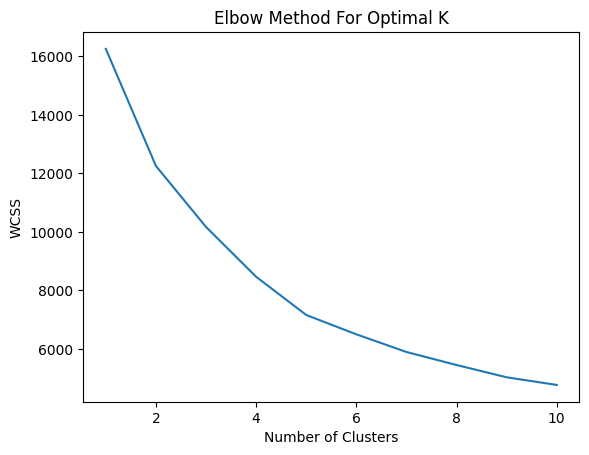

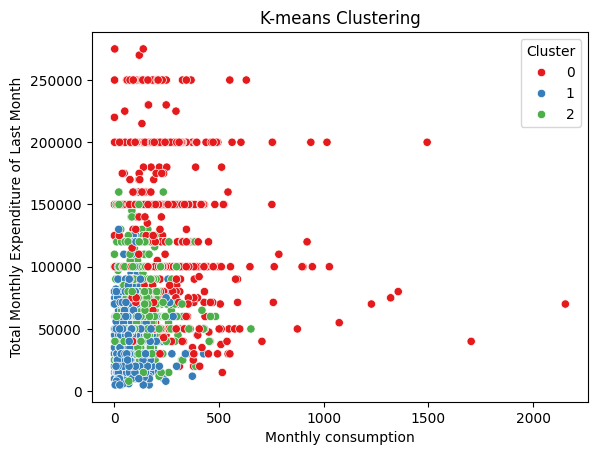

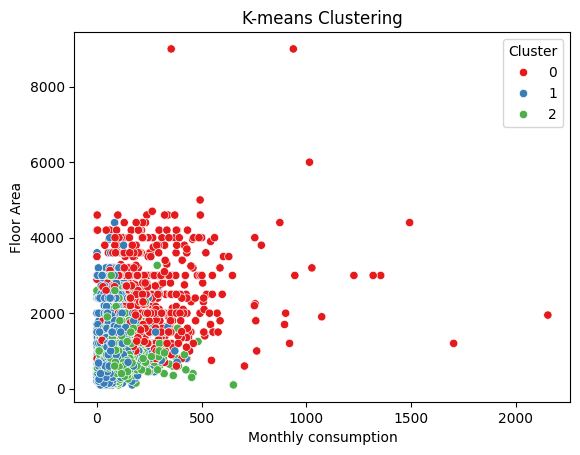

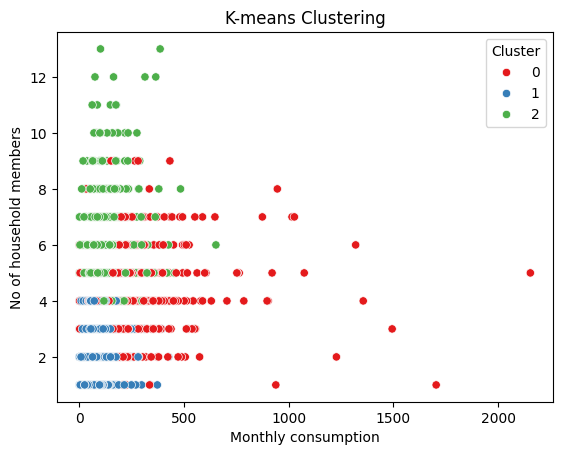

Centroids of clusters:
    consumption  floor_area  total_monthly_expenditure_of_last_month  \
0     0.966023    1.153542                                 1.211757   
1    -0.359108   -0.233171                                -0.487825   
2    -0.049441   -0.350123                                -0.006421   

   no_of_household_members  
0                 0.132497  
1                -0.691792  
2                 0.949201  
Cluster distribution:
 Cluster
1    1954
2    1315
0     794
Name: count, dtype: int64
Silhouette Score: 0.23453589702803193


In [238]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

df = non_smart_household

numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=numeric_cols)

df[numeric_cols] = df_imputed

features = df[['consumption', 'floor_area', 'total_monthly_expenditure_of_last_month', 'no_of_household_members']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(scaled_features)

df['Cluster'] = y_kmeans

sns.scatterplot(x=df['consumption'], y=df['total_monthly_expenditure_of_last_month'], hue=df['Cluster'], palette='Set1')

plt.title('K-means Clustering')
plt.xlabel('Monthly consumption')
plt.ylabel('Total Monthly Expenditure of Last Month')
plt.show()

sns.scatterplot(x=df['consumption'], y=df['floor_area'], hue=df['Cluster'], palette='Set1')

plt.title('K-means Clustering')
plt.xlabel('Monthly consumption')
plt.ylabel('Floor Area')
plt.show()

sns.scatterplot(x=df['consumption'], y=df['no_of_household_members'], hue=df['Cluster'], palette='Set1')

plt.title('K-means Clustering')
plt.xlabel('Monthly consumption')
plt.ylabel('No of household members')
plt.show()

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['consumption', 'floor_area', 'total_monthly_expenditure_of_last_month', 'no_of_household_members'])
print("Centroids of clusters:\n", centroids)

print("Cluster distribution:\n", df['Cluster'].value_counts())

sil_score = silhouette_score(scaled_features, y_kmeans)
print(f"Silhouette Score: {sil_score}")